<a href="https://colab.research.google.com/github/samuelmat/DSPS_sMatylewicz/blob/master/HW6/LabLRtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import division
import pandas as pd
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


###### read in the data


In [3]:
jla = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW6/jla_likelihood_v6/data/jla_lcparams.txt", 
                  sep=" ")
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


###### plot the data: always look at your data!


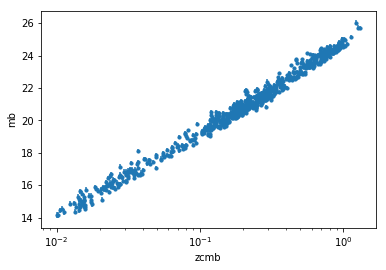

In [4]:
jla.plot.scatter(x="zcmb", y="mb", logx=True, yerr="dmb", s=10);


In [0]:
# the statsmodels packages you will need - remember that you should move all imports to the top at the end

import statsmodels.api as sm
from statsmodels import graphics
from statsmodels.formula import api as smf

In [0]:
#create a log-variable feature in your datase for convenience
jla['log10zcmb'] = np.log10(jla.zcmb)

###### this is how we fit a line to data using the statsmodels "formula" methods
ols stands for ordinary least square fit, which means you obtain the fit by minimizing the residuals

In [7]:
smmodel = smf.ols('mb ~ log10zcmb', data=jla).fit()
smmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mb   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.831e+04
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:01:22   Log-Likelihood:                -150.73
No. Observations:                 740   AIC:                             305.5
Df Residuals:                     738   BIC:                             314.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.6562      0.019   1298.480      0.000      24.619      24.694
log10zcmb      5.3721      0.022    241.474      0.000       5.328       5.416
==============================================================================
Omnibus:                       24.872   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.694
Skew:                           0.433   Prob(JB):                     1.60e-06
Kurtosis:                       3.343   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
smmodel.params

Intercept    24.656231
log10zcmb     5.372055
dtype: float64

In [9]:
smmodel.llf

-150.7263169128296

###### this is simething you can use to visualize the model

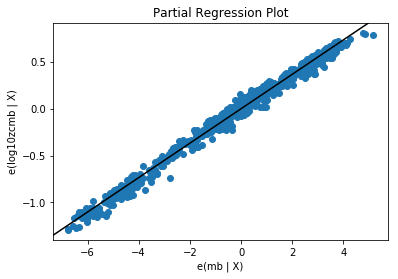

In [10]:
sm.graphics.plot_partregress("log10zcmb", "mb", exog_others=[], 
                             data=jla, obs_labels=False);


###### now use the same function to fit a polynomial: ax**2 + bx + c to your data

In [0]:
jla['x2'] = jla.log10zcmb**2

In [26]:
sm2 = smf.ols('mb ~ log10zcmb + x2', data=jla).fit()
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mb   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.248e+04
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:20:03   Log-Likelihood:                -110.79
No. Observations:                 740   AIC:                             227.6
Df Residuals:                     737   BIC:                             241.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8263      0.026    960.182      0.000      24.776      24.877
log10zcmb      5.9722      0.069     86.816      0.000       5.837       6.107
x2             0.3417      0.037      9.165      0.000       0.269       0.415
==============================================================================
Omnibus:                       46.425   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.352
Skew:                           0.582   Prob(JB):                     5.80e-13
Kurtosis:                       3.687   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
sm2.compare_lr_test(smmodel)

(79.87114983120841, 3.9963946120024177e-19, 1.0)

In [28]:
sm2.graphics.plot_partregress("log10zcmb", "mb", exog_others=[], 
                             data=jla, obs_labels=False);

AttributeError: ignored

In [0]:
smmodel2.llf

-110.79074199722515

###### use the sm.compare_lr_test() 

https://docs.w3cub.com/statsmodels/generated/statsmodels.regression.linear_model.olsresults.compare_lm_test/

In [0]:
...

(79.87114983120887, 3.996394612001486e-19, 1.0)

/Users/fbb/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:202: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


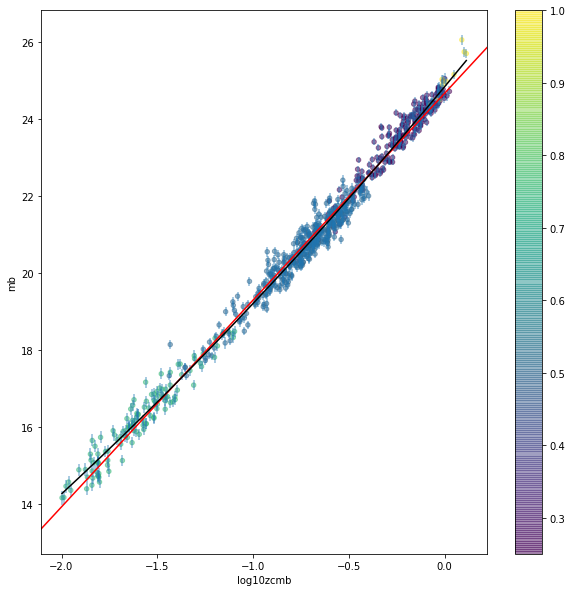

In [0]:
fig, ax = pl.subplots(1, figsize=(10,10))
jla.plot.scatter("log10zcmb", "mb", yerr="dmb", ax=ax,
            color=jla.set/jla.set.max(), alpha=0.5, cmap="viridis")
abline_plot(model_results=smmodel, c= 'r', ax=ax);
ax.plot(jla.sort_values("log10zcmb").log10zcmb,
        smmodel2.predict(jla.sort_values("log10zcmb").log10zcmb), 'k-')